In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, callbacks
import tensorflow as tf
import numpy as np
import signalnet as sn
import pandas as pd

2023-04-28 22:15:43.460033: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("data/testsetallwaves_sr22050.csv")
df = df.loc[:80000,:]

In [3]:
X_train, X_test, y_train, y_test = sn.utilities.train_test(df["pre_filter"].to_numpy(), df["post_filter"].to_numpy())

In [4]:
X_train, X_test, y_train, y_test = sn.utilities.frame_up_same(X_train, X_test, y_train, y_test)

10
(39991, 10)


In [5]:
# y_train_update = []

# for i in y_train:
#     y_train_update.append(i[-1])

# y_train = np.array(y_train_update)

# y_test_update = []

# for i in y_test:
#     y_test_update.append(i[-1])

# y_test = np.array(y_test_update)

In [6]:
X_train.shape

(39991, 10)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [8]:
model = keras.Sequential()

2023-04-28 22:15:46.481140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-28 22:15:46.486026: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-28 22:15:46.486327: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-28 22:15:46.488299: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-28 22:15:46.488625: I tensorflow/compile

In [9]:
model.add(layers.LSTM(15,input_shape=(1,10)))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))
model.compile(loss="mean_squared_error",optimizer ="adam", metrics=["mean_absolute_percentage_error", "cosine_proximity"], )


2023-04-28 22:15:47.807953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 22:15:47.809820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 22:15:47.811258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15)                1560      
                                                                 
 dense (Dense)               (None, 128)               2048      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4,898
Trainable params: 4,898
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train,y_train,epochs=50,batch_size=5,validation_split=0.05, callbacks=[callbacks.EarlyStopping(monitor="loss")])

Epoch 1/50


2023-04-28 22:15:48.231913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 22:15:48.233600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 22:15:48.235636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7597/7599 [============================>.] - ETA: 0s - loss: 0.0074 - mean_absolute_percentage_error: 6340.8901 - cosine_proximity: -0.0213

2023-04-28 22:17:04.698326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 22:17:04.700479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 22:17:04.701918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7599/7599 [==============================] - 79s 10ms/step - loss: 0.0074 - mean_absolute_percentage_error: 6339.9995 - cosine_proximity: -0.0214 - val_loss: 0.0245 - val_mean_absolute_percentage_error: 373.4549 - val_cosine_proximity: -0.1027
Epoch 2/50
7599/7599 [==============================] - 74s 10ms/step - loss: 0.0074 - mean_absolute_percentage_error: 6497.0142 - cosine_proximity: -0.0089 - val_loss: 0.0240 - val_mean_absolute_percentage_error: 131.0341 - val_cosine_proximity: -0.0953
Epoch 3/50
7599/7599 [==============================] - 75s 10ms/step - loss: 0.0074 - mean_absolute_percentage_error: 5902.2983 - cosine_proximity: -0.0104 - val_loss: 0.0239 - val_mean_absolute_percentage_error: 111.9945 - val_cosine_proximity: 0.0367


In [12]:
predictions = model.predict(X_test)

  15/1250 [..............................] - ETA: 4s  

2023-04-28 22:19:36.232430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 22:19:36.233791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 22:19:36.235795: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1250/1250 [==============================] - 4s 3ms/step


In [13]:
predictions.shape

(39992, 10)

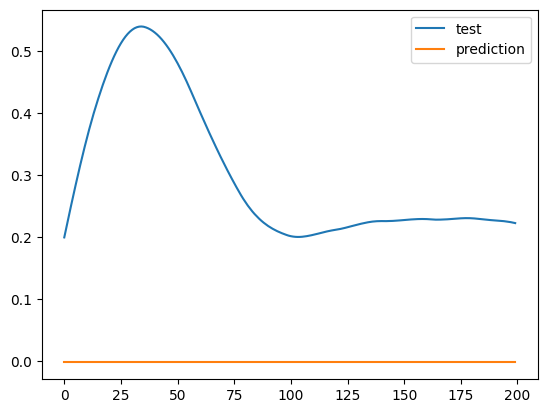

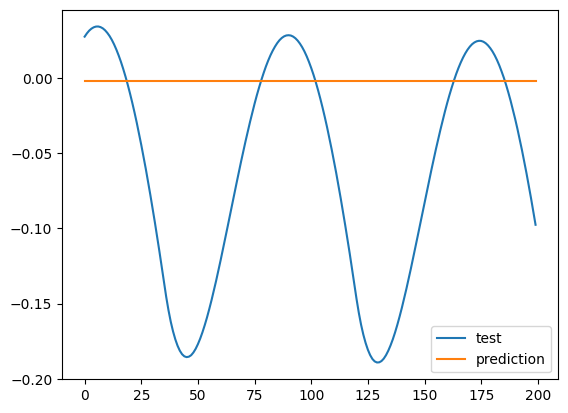

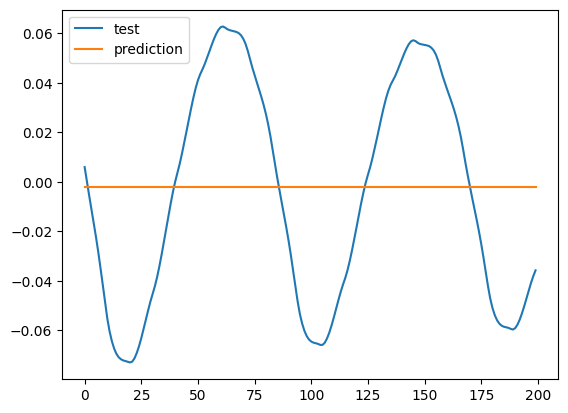

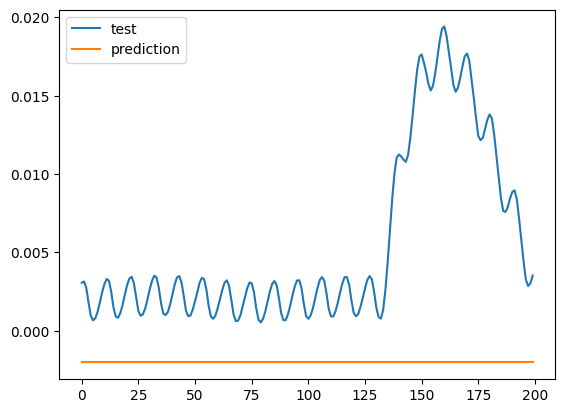

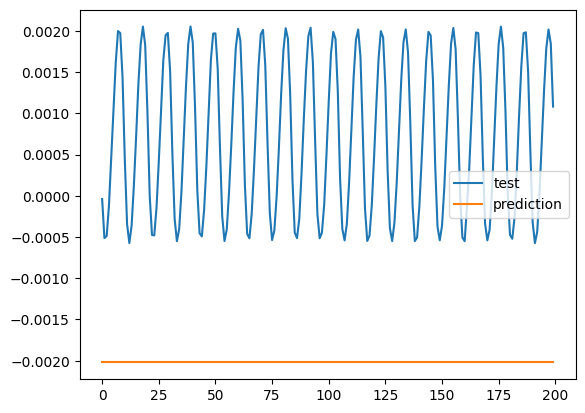

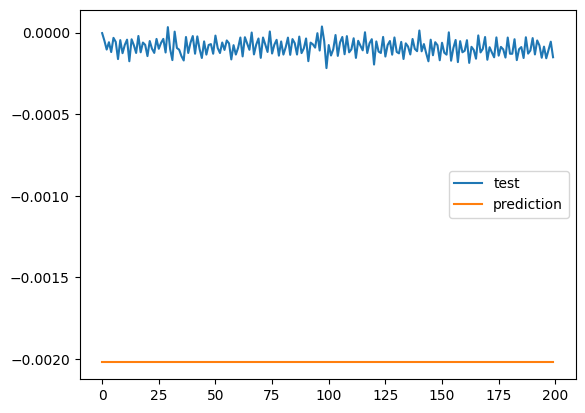

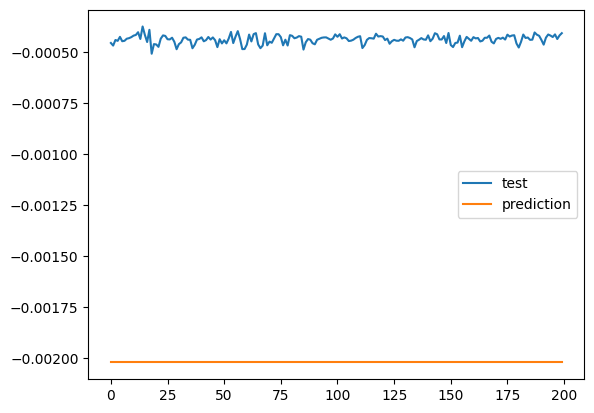

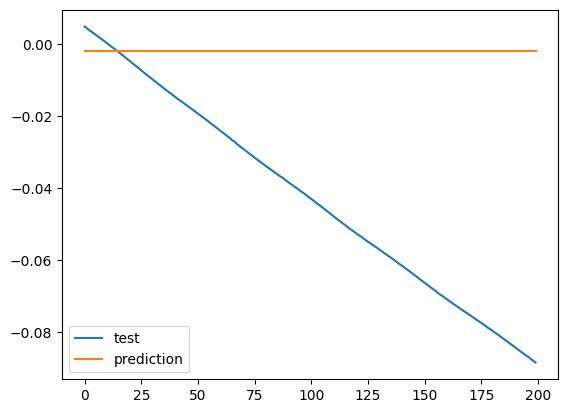

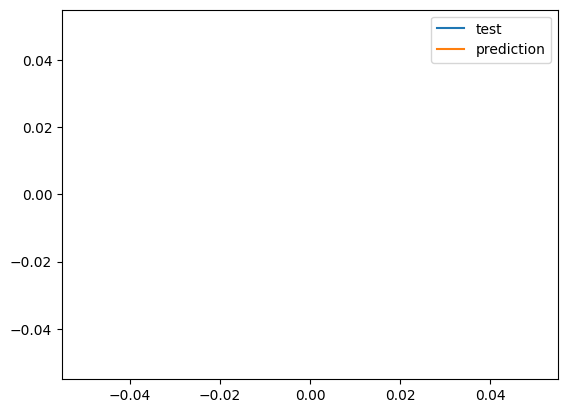

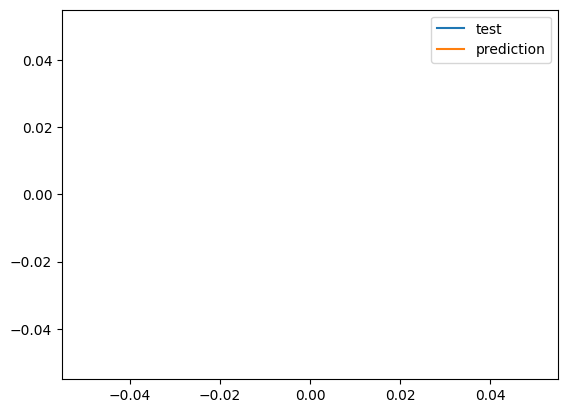

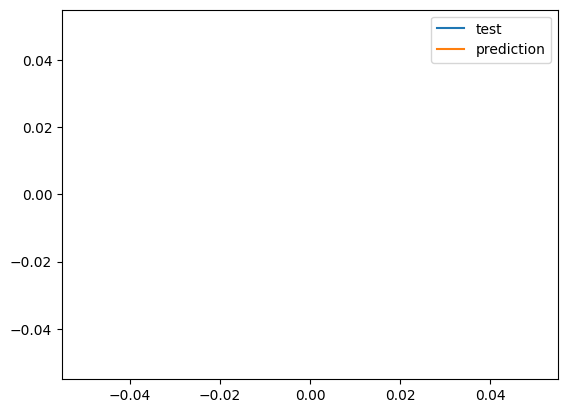

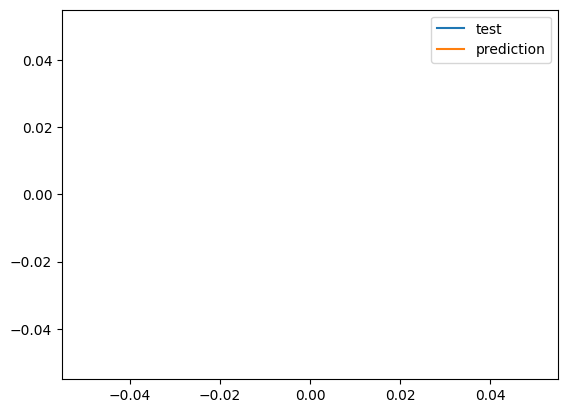

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

for i in range(0, 60000, 5000):
    plt.plot(y_test[i:i+200, -1], label="test")
    plt.plot(predictions[i:i+200,-1], label="prediction")
    plt.legend()
    plt.show()
    plt.clf()

# for i in range(0, 60000, 5000):
#     plt.plot(y_train[i:i+200], label="test")
#     plt.legend()
#     plt.show()
#     plt.clf()


In [15]:
errors = []
for idx, item in enumerate(y_test):
    errors.append(np.square(item-predictions.flatten()[idx]))

mse = sum(errors)/len(errors)

In [16]:
mse

array([0.01138711, 0.01138706, 0.01138696, 0.0113868 , 0.01138657,
       0.01138625, 0.01138583, 0.01138528, 0.0113846 , 0.01138376])

In [17]:
! git add -A
! git commit -m "results"
! git push

[main 8be2cbc] results
 6 files changed, 574 insertions(+), 591 deletions(-)
 rewrite lstm_tests.ipynb (81%)
 delete mode 100644 signalnet/__pycache__/__init__.cpython-310.pyc
 delete mode 100644 signalnet/__pycache__/utilities.cpython-310.pyc
Enumerating objects: 14, done.
Counting objects: 100% (14/14), done.
Delta compression using up to 8 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 344.04 KiB | 15.64 MiB/s, done.
Total 8 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/john-marinelli/filternet.git
   33ad0be..8be2cbc  main -> main
